In [1]:
source_file_path = "C:/Users/eunic/Downloads/part-r-00000 (24)"   #Replace with the downloaded Mapreduce output file location
destination_folder_path = "C:/Users/eunic/Downloads"  #Replace with the location where you want the ouptut csv files to be stored

with open(source_file_path,'r', encoding="utf8") as f:
    FINDSTRING = "All_venues,"
    targets = [line.split(',', 1)[-1] for line in f if FINDSTRING in line]
    with open(destination_folder_path+'/allvenues.csv','wb') as file:
        #Write Header to the csv file
        file.write("BINS,Articles,Inproceedings,Proceedings,Book,Incollection,Phdthesis,Mastersthesis,Total\n".encode())
        for line in targets:
            file.write(line.encode())
            
with open(source_file_path,'r', encoding="utf8") as f:
    FINDSTRING = "AuthorScore,"
    targets = [line.split(',', 1)[-1] for line in f if FINDSTRING in line]
    with open(destination_folder_path+'/authorscore.csv','wb') as file:
        for line in targets:
            file.write(line.encode())
            
with open(source_file_path,'r', encoding="utf8") as f:
    FINDSTRING = "Journal_Inproceedings_Year,"
    targets = [line.split(',', 1)[-1] for line in f if FINDSTRING in line]
    with open(destination_folder_path+'/journal_inproc_year.csv','wb') as file:
        #Write Header to the csv file
        file.write("BIN,Journal,Inproceedings,YearRange(<1990),YearRange(1991-2000),YearRange(2001-2019)\n".encode())
        for line in targets:
            file.write(line.encode())

with open(source_file_path,'r', encoding="utf8") as f:
    FINDSTRING = "Co-AuthorCount,"
    targets = [line.split(',', 1)[-1] for line in f if FINDSTRING in line]
    with open(destination_folder_path+'/CoAuthor.csv','wb') as file:
        #Write Header to the csv file
        file.write("BIN,Co-Author Count\n".encode())
        for line in targets:
            file.write(line.encode())    
            
with open(source_file_path,'r', encoding="utf8") as f:
    FINDSTRING = "MMA,"
    targets = [line.split(',', 1)[-1] for line in f if FINDSTRING in line]
    with open(destination_folder_path+'/MMA.csv','wb') as file:
        #Write Header to the csv file
        file.write("Author Name,Max,Median,Average\n".encode())
        for line in targets:
            file.write(line.encode())             

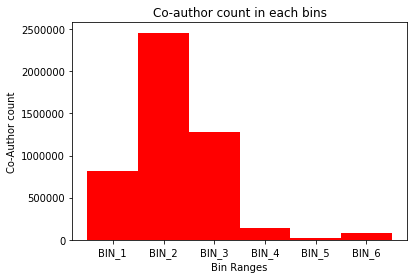

In [7]:
import matplotlib.pyplot as plt 
import pandas as pd

#Histogram for Co-author count in each bins
d = pd.read_csv(destination_folder_path+'/CoAuthor.csv')
bins = d['BIN']
author_count = d['Co-Author Count']
plt.bar(bins,author_count,  width=1, color='r')
plt.xlabel('Bin Ranges')
plt.ylabel('Co-Author count')
plt.title('Co-author count in each bins')
plt.show()

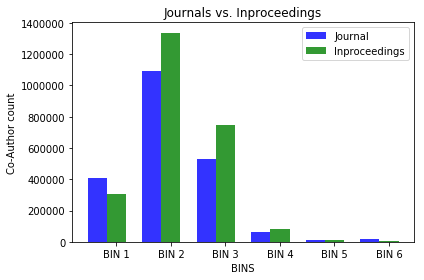

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Histogram for journal and inprocedings in each bin
d = pd.read_csv(destination_folder_path+'/journal_inproc_year.csv')

# data to plot
n_groups = 6
journal_count = d['Journal']
inproc_count = d['Inproceedings'] 

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, journal_count, bar_width, alpha=opacity, color='b',label='Journal')
rects2 = plt.bar(index + bar_width, inproc_count, bar_width, alpha=opacity, color='g', label='Inproceedings')

plt.xlabel('BINS')
plt.ylabel('Co-Author count')
plt.title('Journals vs. Inproceedings')
plt.xticks(index + bar_width, ('BIN 1', 'BIN 2', 'BIN 3', 'BIN 4', 'BIN 5', 'BIN 6'))
plt.legend()

plt.tight_layout()
plt.show()

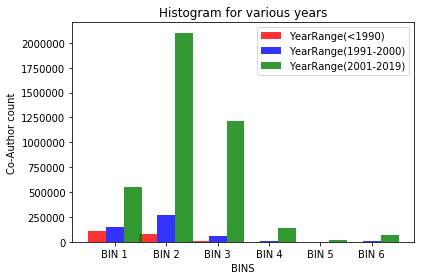

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Histogram for year ranges
d = pd.read_csv(destination_folder_path+'/journal_inproc_year.csv')

# data to plot
n_groups = 6
yearRange1 = d['YearRange(<1990)']
yearRange2 = d['YearRange(1991-2000)']
yearRange3 = d['YearRange(2001-2019)']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects3 = plt.bar(index , yearRange1, bar_width, alpha=opacity, color='r', label='YearRange(<1990)')
rects4 = plt.bar(index + bar_width, yearRange2, bar_width, alpha=opacity, color='b', label='YearRange(1991-2000)')
rects5 = plt.bar(index + 2*bar_width, yearRange3, bar_width, alpha=opacity, color='g', label='YearRange(2001-2019)')

plt.xlabel('BINS')
plt.ylabel('Co-Author count')
plt.title('Histogram for various years')
plt.xticks(index + bar_width, ('BIN 1', 'BIN 2', 'BIN 3', 'BIN 4', 'BIN 5', 'BIN 6'))
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
import sys, csv ,operator
data = csv.reader(open(destination_folder_path+'/authorscore.csv', encoding="utf8"),delimiter=',')
sortedlist = sorted(data, key=operator.itemgetter(1))    # 0 specifies according to first column we want to sort
print("Top 100 authors with least co-authors")
for x in range(0,100):
    print(sortedlist[x])

Top 100 authors with least co-authors
['Ai Kaiho', '0.00379']
['Akiko Saka', '0.00379']
['Alan J. Knox', '0.00379']
['Albert S. B. Edge', '0.00379']
['Alessandro Bonetti', '0.00379']
['Alka Saxena', '0.00379']
['Anthony G. Beckhouse', '0.00379']
['Antje Blumenthal', '0.00379']
['Antti Sajantila', '0.00379']
['Atsutaka Kubosaki', '0.00379']
['Beatrice Bodega', '0.00379']
['Berit Lilje', '0.00379']
['Carlo V. Cannistraci', '0.00379']
['Chieko Kai', '0.00379']
['Christian Schmidl', '0.00379']
['Dipti Vijayan', '0.00379']
['Dmitry A. Ovchinnikov', '0.00379']
['Emiliano Dalla', '0.00379']
['Emily J. Wood', '0.00379']
['Eri Saijyo', '0.00379']
['Ernst Wolvetang', '0.00379']
['Fumi Hori', '0.00379']
['Fumio Nakahara', '0.00379']
['Gundula G. Schulze-Tanzil', '0.00379']
['Helena Persson', '0.00379']
['Hideki Enomoto', '0.00379']
['Hideki Tatsukawa', '0.00379']
['Hiroko Ohmiya', '0.00379']
['Hiromi Nishiyori', '0.00379']
['Hiroo Toyoda', '0.00379']
['Hozumi Motohashi', '0.00379']
['James Briggs

In [6]:
data = csv.reader(open(destination_folder_path+'/authorscore.csv', encoding="utf8"),delimiter=',')
sortedlistrev = sorted(data, key=operator.itemgetter(1), reverse=True)  
print("Top 100 authors with the most co-authors")
for x in range(0,100):
    print(sortedlistrev[x])

Top 100 authors with the most co-authors
['Edward J. Delp', '99.950424']
['Kun Wang', '99.922455']
['Madhu Sudan', '99.83746']
['Sadaaki Miyamoto', '99.816696']
['Jiandong Li 0001', '99.80573']
['Toshihide Ibaraki', '99.801094']
['Yukio Ohsawa', '99.77469']
['Xiao Li', '99.76136']
['Jianfeng Ma', '99.72973']
['Jun Ma', '99.72175']
['Noam Nisan', '99.71767']
['Belur V. Dasarathy', '99.66667']
['Deepak Kapur', '99.62743']
['David N. Blank-Edelman', '99.625']
['Nan Li', '99.493416']
['Robin Milner', '99.48332']
['Mark Guzdial', '99.447205']
['Vijay K. Bhargava', '99.42911']
['Mohamed G. Gouda', '99.40975']
['Alessandro Astolfi', '99.36719']
['Markus H. Gross', '99.344826']
['Harald Haas', '99.3171']
['Ronald Fagin', '99.2445']
['Stefan Edelkamp', '99.2242']
['Seong-Whan Lee', '99.21649']
['John D. McGregor', '99.16364']
['Costas S. Iliopoulos', '99.113335']
['Raghu Ramakrishnan', '99.09887']
['Sudip Misra', '99.04636']
['Shigeo Hirose', '98.99845']
['Yang Zhao', '98.981064']
['Ioannis K. 